In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

hourly_data = pd.read_csv('./data/hour.csv')
hourly_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
print(f"Shape of data: {hourly_data.shape}")
print(f"Number of missing values in the data: {hourly_data.isnull().sum().sum()}")

Shape of data: (17379, 17)
Number of missing values in the data: 0


In [7]:
# get the statistics on the numerical columns
hourly_data.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


## Preprocessing Temporal and Weather Features

In [15]:
# copy of original data
preprocessed_data = hourly_data.copy()

In [16]:
# transform seasons
seasons_mapping = {
    1: 'winter', 2: 'sprint', 3: 'summer', 4: 'fall'
}
preprocessed_data['season'] = preprocessed_data['season'].apply(
    lambda x: seasons_mapping[x]
)
preprocessed_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,winter,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,winter,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,winter,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,winter,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,winter,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [18]:
# transform yr
yr_mapping = {
    0: 2011,
    1: 2012
}
preprocessed_data['yr'] = preprocessed_data['yr'].apply(
    lambda x: yr_mapping[x]
)
preprocessed_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,winter,2011,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,winter,2011,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,winter,2011,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,winter,2011,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,winter,2011,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [20]:
# transform weekday column
weekday_mapping = {
    0: 'Sunday', 1: 'Monday', 2:' Tuesday', 3: 'Wednesday', 4: 'Thursday',
    5: 'Friday', 6: 'Saturday'
}
preprocessed_data['weekday'] = preprocessed_data['weekday'].apply(
    lambda x: weekday_mapping[x]
)
preprocessed_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,winter,2011,1,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,winter,2011,1,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,winter,2011,1,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,winter,2011,1,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,winter,2011,1,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [21]:
# transform weathersit
weather_mapping = {
    1: 'clear', 2: 'cloudy', 3: 'light_rain_snow', 4: 'heavy_rain_snow'
}
preprocessed_data['weathersit'] = preprocessed_data['weathersit'].apply(
    lambda x: weather_mapping[x]
)
preprocessed_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,winter,2011,1,0,0,Saturday,0,clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,winter,2011,1,1,0,Saturday,0,clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,winter,2011,1,2,0,Saturday,0,clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,winter,2011,1,3,0,Saturday,0,clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,winter,2011,1,4,0,Saturday,0,clear,0.24,0.2879,0.75,0.0,0,1,1


In [22]:
# transform hum  and windspeed
preprocessed_data['hum'] = preprocessed_data['hum'] * 100
preprocessed_data['windspeed'] = preprocessed_data['windspeed'] * 67
preprocessed_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,winter,2011,1,0,0,Saturday,0,clear,0.24,0.2879,81.0,0.0,3,13,16
1,2,2011-01-01,winter,2011,1,1,0,Saturday,0,clear,0.22,0.2727,80.0,0.0,8,32,40
2,3,2011-01-01,winter,2011,1,2,0,Saturday,0,clear,0.22,0.2727,80.0,0.0,5,27,32
3,4,2011-01-01,winter,2011,1,3,0,Saturday,0,clear,0.24,0.2879,75.0,0.0,3,10,13
4,5,2011-01-01,winter,2011,1,4,0,Saturday,0,clear,0.24,0.2879,75.0,0.0,0,1,1


In [23]:
# visualize preprocessed columns
cols = ['season', 'yr', 'weekday', 'weathersit', 'hum', 'windspeed']
preprocessed_data[cols].sample(10, random_state=123)

,season,yr,weekday,weathersit,hum,windspeed
5792,summer,2011,Saturday,clear,74.0,8.9981
7823,fall,2011,Sunday,clear,43.0,31.0009
15426,fall,2012,Tuesday,cloudy,77.0,6.0032
15028,fall,2012,Sunday,clear,51.0,22.0028
12290,sprint,2012,Friday,cloudy,89.0,12.9980
3262,sprint,2011,Friday,clear,64.0,7.0015
10763,sprint,2012,Thursday,clear,42.0,23.9994
12384,sprint,2012,Tuesday,light_rain_snow,82.0,11.0014
6051,summer,2011,Wednesday,clear,52.0,19.0012
948,winter,2011,Saturday,clear,80.0,0.0000


In [24]:
"""
asssert that total number of rides is equal to the sum of registered
and casual ones
"""
assert(
    preprocessed_data.casual + preprocessed_data.registered == preprocessed_data.cnt
).all(), 'Sum of casual and registered rides not equal to total number of rides'

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


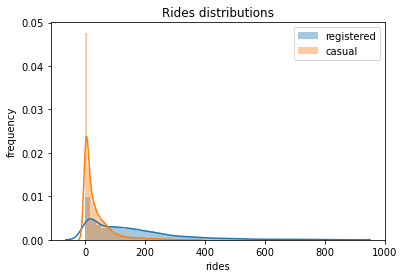

In [27]:
# plot distributions of reigstered vs casual rides
sns.distplot(preprocessed_data['registered'], label='registered')
sns.distplot(preprocessed_data['casual'], label='casual')
plt.legend()
plt.xlabel('rides')
plt.ylabel('frequency')
plt.title("Rides distributions")
plt.savefig('./figs/rides_distributions.png', format='png')

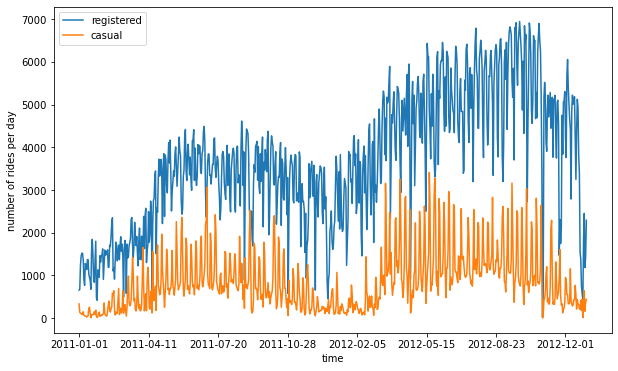

In [28]:
# plot evolution of rides over time
plot_data = preprocessed_data[['registered', 'casual', 'dteday']]
ax = plot_data.groupby('dteday').sum().plot(figsize=(10, 6))
ax.set_xlabel("time")
ax.set_ylabel("number of rides per day")
plt.savefig('./figs/rides_daily.png', format='png')